In [1]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

from random import seed
import matplotlib.pyplot as plt

from modules.smc import Particle, Cloud
from modules.gradient import ProbabilityDerivative, Gradient
from modules.hamiltonian import *
from modules.measurements import *


# np.random.seed(43)
# seed(43)

In [2]:
# Some initial parameters
n_spins = 1
beta = 0.3

n_cycles = 30
n_particles = 300
gradient_iterations = 1000
lr = 0.1

X = np.arange(n_cycles)
MSE = []

In [3]:
# Create initial random basis angles
theta = np.random.rand(n_spins) * np.pi
phi = np.random.rand(n_spins) * 2 * np.pi
# theta = np.array([0.])
# phi = np.array([0.])

angles = np.array([theta, phi]).T

# Create target hamiltonian
x_t = [0]
z_t = [-1]
# z_t = [-1, 0.3, 0.8]
# # x_t = [0]
print(f"x_t {x_t}")
print(f'z_t{z_t}')

hamiltonian_t = Hamiltonian(n_spins, beta, z=z_t, x=x_t)
hamiltonian_t.set_density_mat()

# Create an initial pull of random hamiltonians
# (we call it "particle" according to Sequential Monte Carlo terminology)
g_cloud = Cloud(n_particles, n_spins, beta, fields=["z", 'x'])
for i in range(n_cycles):
    # Measure target hamiltonian
    singles_t = hamiltonian_t.measure(angles)

    # Update weight according to particle's distance to target hamiltonian
    g_cloud.list_weight_update(angles, singles_t)

    # Make a recycling wheel to get rid of far particles
    g_cloud.resampling_wheel()

    # Weighted sum of all particles -- our current best result
    hamiltonian_g = g_cloud.weighted_sum()

    mse = hamiltonian_difference(hamiltonian_t, hamiltonian_g)
    MSE.append(mse)
    print(f"iteration {i}")
    print(f"mse {mse}")
    print(f"hamiltonian_g.z {hamiltonian_g.z}")
    print(f"hamiltonian_g.x {hamiltonian_g.x}")
    singles_g = hamiltonian_g.measure(angles)
    print(f"distance {distance_by_measurements(singles_g, singles_t)}")
    print(f"theta {angles[0, 0] / np.pi}")
    print(f"phi {angles[0, 1] / np.pi}")
    print('')

    # Make a gradient descent to determine new angles
    grad = Gradient(hamiltonian_t, hamiltonian_g, angles)
    angles = grad.gradient_descent(lr=lr, num_iterations=gradient_iterations)

x_t [0]
z_t[-1]
iteration 0
mse 1.0439740093993304
hamiltonian_g.z [-0.0424593]
hamiltonian_g.x [-0.35649659]
distance 3.3068343165667973e-08
theta 0.5902473234476003
phi 0.777540856322048

iteration 1
mse 1.1169341601330425
hamiltonian_g.z [-0.00763705]
hamiltonian_g.x [-0.36352432]
distance 1.077313387013739e-07
theta 0.5885668668877976
phi 0.7779217611907354

iteration 2
mse 1.1401657924840258
hamiltonian_g.z [0.00613578]
hamiltonian_g.x [-0.3575704]
distance 4.730511208848214e-07
theta 0.5854244170738758
phi 0.7786228269838066

iteration 3
mse 1.035432541231832
hamiltonian_g.z [-0.03801521]
hamiltonian_g.x [-0.33168932]
distance 7.669661153270917e-06
theta 0.5787600427765204
phi 0.780068213913878

iteration 4
mse 0.058846364607070434
hamiltonian_g.z [-0.76428781]
hamiltonian_g.x [-0.05732474]
distance 1.0487508339466939e-06
theta 0.5531833641001331
phi 0.7854698555233989

iteration 5
mse 0.04517032339221913
hamiltonian_g.z [-0.79249315]
hamiltonian_g.x [-0.04594814]
distance 3.5994

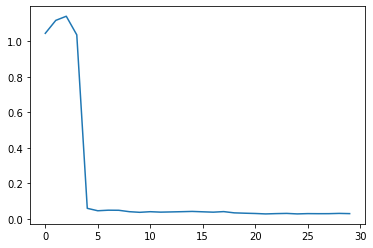

In [4]:
plt.plot(X, MSE)